<a href="https://colab.research.google.com/github/jamesluttringer2019/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
##### Begin Working Here #####
#load in the zip file, unzip it, and view the data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv
!tail LoanStats_2018Q4.csv

--2019-10-29 18:50:05--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   870KB/s    in 26s     

2019-10-29 18:50:31 (855 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    
Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","

In [2]:
#import the data using pandas, skip the url at the beginning of the data
#skip the two lines at the end of the data
import pandas as pd
pd.options.display.max_rows=999
pd.options.display.max_columns = 100
df = pd.read_csv('LoanStats_2018Q4.csv', header = 1, skipfooter=2)
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,

In [0]:
#check dtypes to see if any don't seem right 
df.dtypes

In [0]:
#check for null values, view them by column, sort them from least to greatest
df.isnull().sum().sort_values()

In [0]:
#drop the columns that are entirely NaN values
df1 = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)

In [0]:
#convert int_rate column from a string to a float, remove blank space and %
def int_rate_to_float(int_rate_string):
  return float(int_rate_string.strip().strip('%'))

df1['int_rate'] = df['int_rate'].apply(int_rate_to_float)

In [0]:
#clean emp_title
#make a function to determine if the data is a str or invalid (NaN),
#put all strings into title format, replace NaN values with unknown

def clean_title(title):
  if isinstance(title,str):
    return title.strip().title()
  else:
    return "unknown"

df1['emp_title'] = df['emp_title'].apply(clean_title)

In [0]:
#create a new column where you store a bool value stating whether or not the emp_title object contained the word manager
df1['emp_title_manager'] = df['emp_title'].str.contains('Manager')

In [0]:
#filter the data. retain rows where the condition is true and use them to create a new dataframe 
condition=(df1['emp_title_manager']==True)
managers = df1[condition]

In [0]:
#filter the data to do the opposite of the last code block
non_managers = df1[~condition]

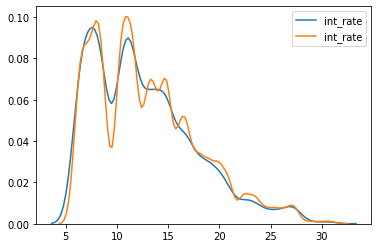

In [11]:
#plot the manager vs non manager int_rate
import seaborn as sns
sns.kdeplot(managers['int_rate'])
sns.kdeplot(non_managers['int_rate'])

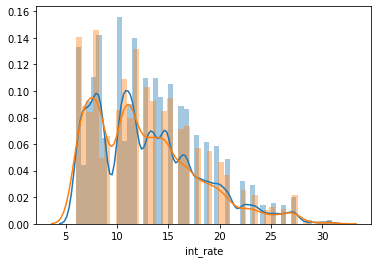

In [12]:
sns.distplot(non_managers['int_rate'])
sns.distplot(managers['int_rate'])

In [0]:
#convert the issue_d column to the datetime datatype.
df1['issue_d'] = pd.to_datetime(df1['issue_d'], infer_datetime_format=True)

In [15]:
df1['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
#create a year column  and a month column
df1['issue_year'] = df1['issue_d'].dt.year
df1['issue_month'] = df1['issue_d'].dt.month

In [0]:
#change column to datetime format
df1['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],
                                         infer_datetime_format=True)

In [0]:
#calculates how long it has been since the earliest credit line was opened, and use this data to overwrite the column
df1['days_from_earliest_credit_to_issue'] = (df1['issue_d'] - df1['earliest_cr_line']).dt.days

In [47]:
df['term'].head()

0     36 months
1     60 months
2     60 months
3     36 months
4     60 months
Name: term, dtype: object

In [44]:
df['term'].isnull().sum()

0

In [51]:
#convert term to an int 
def term_to_int(term):
  return int(term.strip('months').strip())
df1['term'] = df['term'].apply(term_to_int)
df1['term'].head()

0    36
1    60
2    60
3    36
4    60
Name: term, dtype: int64

In [56]:
#assign loan status rank 
def loan_status_rank(status):
  if status == 'Fully Paid' or status == 'Current':
    return 1
  else:
    return 0
df1['loan_status_is_great'] = df1['loan_status'].apply(loan_status_rank)
df1['loan_status_is_great'].head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status_is_great, dtype: int64

In [57]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,

In [0]:
#create new columns for last payment date month and year
df1['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)
df1['last_pymnt_d'].head()
df1['last_pymnt_d_m'] = df1['last_pymnt_d'].dt.month
df1['last_pymnt_d_y'] = df1['last_pymnt_d'].dt.year


In [92]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue-year,issue_month,issue_year,loan_status_is_great,last_pymnt_d_m,last_pymnt_d_y
0,20000,20000,20000.0,36,14.47,688.13,C,C2,Bus Driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,2019-09-01,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2018,1,9.0,2019.0
1,25000,25000,25000.0,60,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,2019-04-01,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True,2018,12,2018,1,4.0,2019.0
2,26500,26500,26500.0,60,11.31,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,2006-12-01,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,2019-09-01,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2018,1,9.0,2019.0
3,10400,10400,10400.0,36,12.98,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,2013-07-01,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,2019-09-01,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2018,1,9.0,2019.0
4,35000,35000,35000.0,60,12.98,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,2018-12-01,Fully Paid,n,de

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [98]:
df['revol_util'].isnull().sum()

156

In [99]:
#remove the % from revol_util and convert to float. Also accounts for NaN values
import numpy as np

def clean_revol_util(revol_util_str):
  if isinstance(revol_util_str, str):
    return float(revol_util_str.strip('%'))
  else:
    return np.NaN
df1['revol_util'] = df['revol_util'].apply(clean_revol_util)
df1['revol_util'].head()


0    73.0
1    36.8
2    65.4
3     9.8
4    74.9
Name: revol_util, dtype: float64

In [117]:
df['emp_title'].value_counts()[:30]

Teacher                     2090
Manager                     1773
Registered Nurse             952
Driver                       924
RN                           726
Supervisor                   697
Sales                        580
Project Manager              526
General Manager              523
Office Manager               521
Owner                        420
Director                     402
Truck Driver                 387
Operations Manager           387
Nurse                        326
Engineer                     325
Sales Manager                304
manager                      301
Supervisor                   270
Administrative Assistant     269
Accountant                   268
Server                       265
Vice President               261
Mechanic                     258
Account Manager              254
Police Officer               252
teacher                      249
Technician                   248
Manager                      246
Store Manager                222
Name: emp_

In [0]:
#give all titles the same format to avoid repeats (manager)
def streamline_titles(title):
  if isinstance(title,str):
    return title.strip().title()
  else:
    return title

df1['emp_title'] = df['emp_title'].apply(streamline_titles)

In [121]:
df1['emp_title'].value_counts()

Teacher                          2557
Manager                          2395
Registered Nurse                 1418
Driver                           1258
Supervisor                       1160
                                 ... 
Natural Resource Specialist         1
Drilling Rig Field Operations       1
Senior Claims Rep.                  1
Retention Specialist                1
Motorhand                           1
Name: emp_title, Length: 34901, dtype: int64

In [124]:
#create a list of the top titles, then change all that are not in the list to other. I excluded the unknown and added it to other
top_emp = df1['emp_title'].value_counts()[1:21].axes[0]
def best_titles(title):
  if title in top_emp:
    return title
  else:
    return "other"

df1['emp_title'] = df['emp_title'].apply(best_titles)
df1.head(25)



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue-year,issue_month,issue_year,loan_status_is_great,last_pymnt_d_m,last_pymnt_d_y,days_from_earliest_credit_to_issue
0,20000,20000,20000.0,36,14.47,688.13,C,C2,other,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73.0,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,2019-09-01,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2018,1,9.0,2019.0,14428
1,25000,25000,25000.0,60,16.14,609.82,C,C4,other,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,2019-04-01,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True,2018,12,2018,1,4.0,2019.0,5570
2,26500,26500,26500.0,60,11.31,580.28,B,B3,other,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,2006-12-01,2,NaN,NaN,17,0,43640,65.4,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,2019-09-01,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2018,1,9.0,2019.0,4383
3,10400,10400,10400.0,36,12.98,350.32,B,B5,other,10+ years,MORTGAGE,56099.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,2013-07-01,2,32.0,67.0,8,1,1669,9.8,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,2019-09-01,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,2018,1,9.0,2019.0,1979
4,35000,35000,35000.0,60,12.98,796.00,B,B5,other,7 years,MORTGAGE,211646.0,Source Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01